In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator

/Users/kechan/Documents/TensorFlowStuff/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
base_dir = 'cropped'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=32, classes=['UNK', '5c', '10c', '25c', '$1', '$2'])

Found 768 images belonging to 6 classes.


In [18]:
train_generator.class_indices

{'$1': 4, '$2': 5, '10c': 2, '25c': 3, '5c': 1, 'UNK': 0}

In [10]:
from data_util import *

In [10]:
indices_class = reverse_dict(train_generator.class_indices)

In [11]:
indices_class

{0: 'UNK', 1: '5c', 2: '10c', 3: '25c', 4: '$1', 5: '$2'}

In [2]:
from keras.models import Sequential
from keras.layers import Dense

baseline_model = Sequential()
baseline_model.add(Dense(2048, activation='relu', input_shape=(64*64*3,) ))
baseline_model.add(Dense(6, activation='softmax'))

In [3]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              25167872  
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 12294     
Total params: 25,180,166
Trainable params: 25,180,166
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras import optimizers

In [5]:
baseline_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [19]:
history = baseline_model.fit_generator(train_generator, steps_per_epoch=24, epochs=10)

Epoch 1/10


ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (32, 150, 150, 3)

In [8]:
height = 64
width = 64

outfile_path = "testing/train_" + str(height) + "_" + str(width) + ".hdf5"

In [11]:
train_set_x, train_set_y, _, _, _, _, classes = load_all_data(outfile_path)

In [12]:
train_set_x.shape

(768, 64, 64, 3)

In [13]:
outfile_path = "testing/validation_" + str(height) + "_" + str(width) + ".hdf5"

In [14]:
_, _, dev_set_x, dev_set_y, _, _, classes = load_all_data(outfile_path)

In [15]:
outfile_path = "testing/test_" + str(height) + "_" + str(width) + ".hdf5"

In [16]:
_, _, _, _, test_set_x, test_set_y, classes = load_all_data(outfile_path)

In [17]:
train_set_x = train_set_x.reshape((-1, 64*64*3))
dev_set_x = dev_set_x.reshape((-1, 64*64*3))
test_set_x = test_set_x.reshape((-1, 64*64*3))

In [18]:
train_set_x = train_set_x.astype('float32') / 255.
dev_set_x = dev_set_x.astype('float32') / 255.
test_set_x = test_set_x.astype('float32') / 255.

In [19]:
from keras.utils import to_categorical

train_set_y = to_categorical(train_set_y)
dev_set_y = to_categorical(dev_set_y)
test_set_y = to_categorical(test_set_y)

In [48]:
history_ = baseline_model.fit(train_set_x, train_set_y, epochs=50, batch_size=32, validation_data=(dev_set_x, dev_set_y))

Train on 768 samples, validate on 192 samples
Epoch 1/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4428 - acc: 0.8242 - val_loss: 2.3768 - val_acc: 0.3854
Epoch 2/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4657 - acc: 0.8294 - val_loss: 1.9310 - val_acc: 0.3958
Epoch 3/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4212 - acc: 0.8411 - val_loss: 4.3348 - val_acc: 0.3229
Epoch 4/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4151 - acc: 0.8438 - val_loss: 2.6894 - val_acc: 0.3490
Epoch 5/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4614 - acc: 0.8346 - val_loss: 2.3916 - val_acc: 0.3438
Epoch 6/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4204 - acc: 0.8411 - val_loss: 2.3308 - val_acc: 0.3750
Epoch 7/50
768/768 [==============================] - 19s 25ms/step - loss: 0.4054 - acc: 0.8503 - val_loss: 2.5685 - val_acc: 0.3490
Epoch 8/50
768/7

In [49]:
for measure in history.history.keys():
    history.history[measure] += history_.history[measure]

In [53]:
history_.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 50,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 768,
 'steps': None,
 'verbose': 1}

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

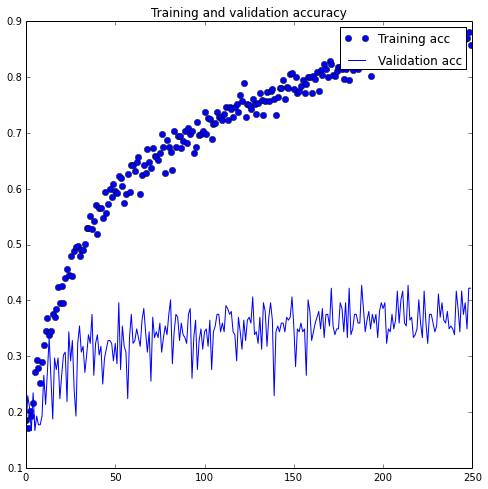

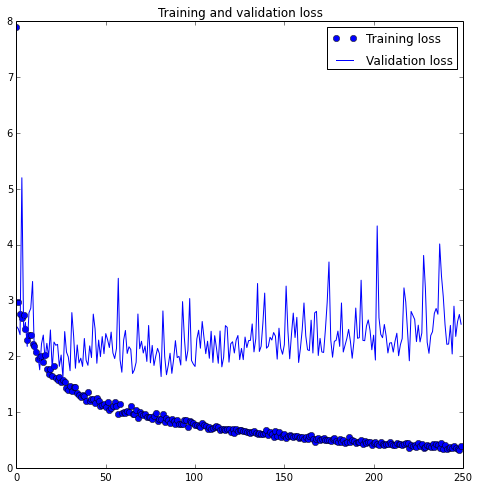

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(8, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
import pickle

In [56]:
with open('tmp.pickle', 'wb') as f:
    pickle.dump(history.history, f)

In [58]:
pickle.load('tmp.pickle')

AttributeError: 'str' object has no attribute 'readline'

In [59]:
type(history.history)

dict

In [60]:
with open('tmp.pickle', 'rb') as f:
    tmp = pickle.load(f)

In [62]:
baseline_model.load_weights?

In [ ]:
baseline_model.